In [ ]:
# let's build a bigram language model here :) 

## In bigram language modelling we only work with 2 characters at a time 
## Only looking at one character which is given, then model try to predict next character. 
## It only look at previous character to find the next character!! 

In [2]:
# let's explore the dataset first 
# !wget -O "names.txt" https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

## loading the data 
data = open("names.txt", 'r').read().splitlines() 

In [3]:
# data exploring 

## len of words 
print(f"Len of all words: {len(data)}")

## largest and smallest words: 
print(f"{min(len(w) for w in data)} -> smallest word count  \n{max(len(w) for w in data)} -> largest word count")

Len of all words: 32033
2 -> smallest word count  
15 -> largest word count


In [4]:
## let's see the bigrams in our dataset 

b = dict()
for w in data: 
    chs = ["<S>"] + list(w) + ["<E>"]  # adding start and end token for each word
    for ch1, ch2 in zip(chs, chs[1:]): 
        bigram = (ch1, ch2) 
        b[bigram] = b.get(bigram, 0)+1 # If vale not exists in dict we are adding 0 
                           ## -If value exists we are adding 1, so exist value + 1

In [13]:
# storing in dict is not good, let's store in the 2 dim array 
## where row is first character, column is second character and value is counts of both 

### let's store as a tensor array 
import torch 

N = torch.zeros((28, 28), dtype = torch.int32) # 26 english words + <S> and <E> token

In [35]:
# unique charcters in dataset 
chars = sorted(list(set("".join(data)))) 

## let's create a lookup table like label2id and id2label 
stoi = {k:v for v, k in enumerate(chars)} 
itos = {v:k for v, k in enumerate(chars)} 
stoi['<S>'] = 26 
stoi["<E>"] = 27
itos[26 ] = '<S>' 
itos[27] = "<E>"


## let's store everything in tensors
for w in data: 
    chs = ["<S>"] + list(w) + ["<E>"]  # adding start and end token for each word
    for ch1, ch2 in zip(chs, chs[1:]): 
        ix1, ix2 = stoi[ch1], stoi[ch2] 
        N[ix1, ix2] += 1


In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline 

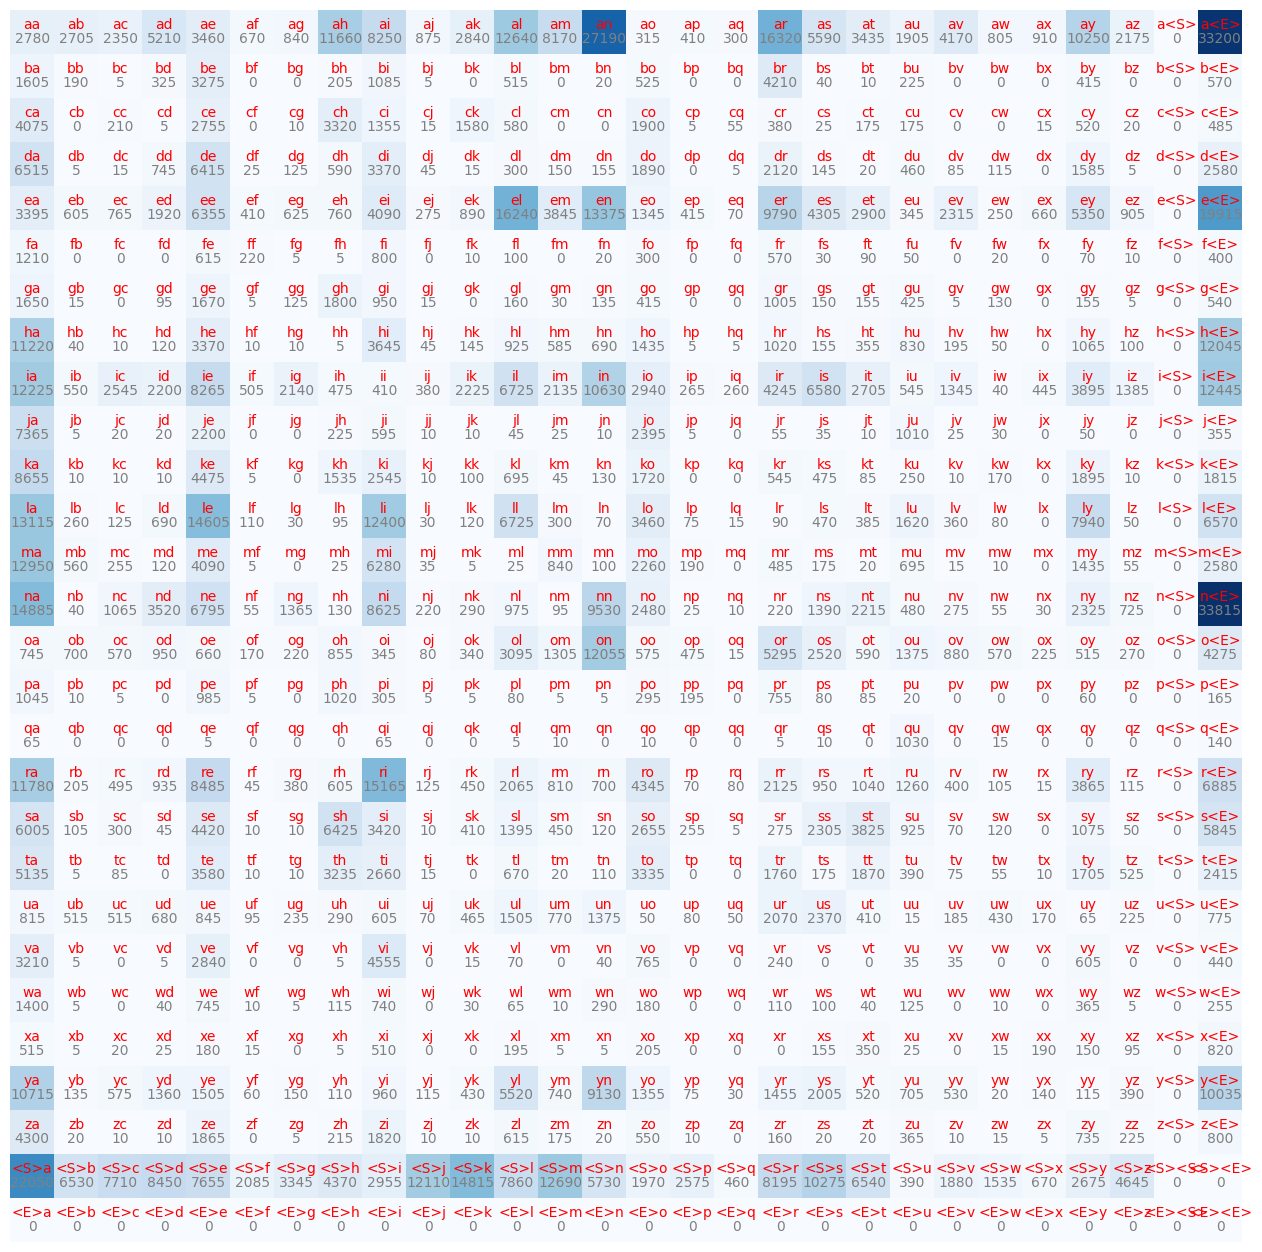

In [40]:
# let's visualize the tensors 

plt.figure(figsize = (16, 16)) 
plt.imshow(N, cmap="Blues")

for i in range(28): 
    for j in range(28): 
        chstr = itos[i] + itos[j] 
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "red")
        plt.text(j, i, N[i,j].item(), ha = "center", va = "top", color = "gray")

plt.axis("off"); 